### 에제
1. csv 폴더에서 test_csv 폴더의 '오프라인.csv' 파일 로드
2. 컬럼명 변경 -> [기준년월, '업종', 성별, 연령대, 총이용건수, 총이용금액]
3. 결측치가 존재하는가?
    - 결측치에 대한 체크
    - 성별 컬럼에서 '-' 데이터가 존재하는가?
4. 기준년월 컬럼의 데이터 타입 -> 시계열로 변경
5. 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?
    - 기준년 컬럼을 생성하여 기준년월에서 년도만 추출하여 대입
    - 건당이용금액 컬럼을 생성해 '총이용금액/총이용건수'의 결과를 대입
    - 기준년과 성별을 기준으로 그룹화, 그룹화연산 -> 건당이용금액의 평균

In [265]:
import pandas as pd

In [266]:
offline = pd.read_csv('../../csv/test_csv/오프라인.csv', encoding='cp949')

In [267]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [268]:
# 컬럼명 변경
# case1: rename() -> 특정 컬럼이나 인덱스 변경시 사용
# columns 변수를 변경하는 것과의 차이점: rename()은 변경하기 전에 확인 가능
offline.rename(
    columns = {
        'crym' : '기준년월',
        'tco_btc_nm' : '업종',
        'ma_fem_dc' : '성별',
        'agegrp_dc' : '연령대',
        'tco_btc_u_ct' : '총이용건수',
        'tco_btc_u_am' : '총이용금액'
    }
    # inplace=True
)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [269]:
# case2: DataFrame 안에 있는 columns 변수의 데이터 변경
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [270]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [271]:
# 결측치의 개수 확인
# 결측치인가? -> 합(sum())
# sum(offline.isna().values)
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [272]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.2+ KB


In [273]:
# 항목정의서 -> 성별 컬럼의 결측치는 -
# -의 개수 확인
sum(offline['성별']=='-')

0

In [274]:
offline['성별'].isin(['-', '9']).sum()

np.int64(0)

In [275]:
from datetime import datetime

In [276]:
type(offline['기준년월'])

pandas.core.series.Series

In [277]:
# datetime 라이브러리 안에 존재하는 시계열로 변환하는 함수
datetime.strptime(str(offline['기준년월'][0]), '%Y%m')

datetime.datetime(2019, 1, 1, 0, 0)

In [278]:
offline['기준년월'].map(
    lambda x : datetime.strptime( str(x), '%Y%m' )
)

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [279]:
# 기준년월 컬럼 데이터타입을 시계열로 변경
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [280]:
offline['기준년월']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [281]:
# 기준년 컬럼을 생성: 기준년월에서 년도만 추출하여 대입
# case1 : map 함수 이용
offline['기준년월'].map(
    lambda x : x.strftime('%Y')
)

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [282]:
# case2 : Series에서 datetime 내장함수 이용
offline['기준년월'].dt.strftime('%Y')

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [283]:
# case3 : Series에서 datetime 변수 이용
offline['기준년'] = offline['기준년월'].dt.year

In [284]:
# 건당이용금액 컬럼 생성: 총이용금액 / 총이용건수
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']
offline.head(2)

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7600.0,2019,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.0,2019,51342.269129


In [285]:
# 기준년, 성별을 기준으로 그룹화 -> 그룹화연산 '건당이용금액'의 평균
offline.groupby(['기준년', '성별'])[['건당이용금액']].mean()

건당이용금액
기준년  성별              
2019 1   39184.349662
     2   38107.838544
2020 1   44009.589591
     2   41389.763130
2021 1   46948.320084
     2   43306.318972

In [286]:
# 데이터프레임 데이터의 구조를 재구조화
# pivot_table() -> pandas 안에 존재, DataFrame 안에 존재
pd.pivot_table(
    offline,
    index = ['기준년', '성별'],
    values = '건당이용금액',
    aggfunc = 'mean'
)

건당이용금액
기준년  성별              
2019 1   39184.349662
     2   38107.838544
2020 1   44009.589591
     2   41389.763130
2021 1   46948.320084
     2   43306.318972

In [287]:
offline.pivot_table(
    index = ['기준년', '성별'],
    values = '총이용건수',
    aggfunc = 'sum'
)

총이용건수
기준년  성별           
2019 1   131187614
     2   205329245
2020 1   130520862
     2   184538394
2021 1    94072464
     2   130804813

In [288]:
# 기준년월, 업종별 총 이용금액의 합계
group_data = offline.groupby(['기준년월', '업종'])[['총이용금액']].sum()

In [289]:
import matplotlib.pyplot as plt
import platform

In [290]:
# plt의 폰트 설정 변경 (한글 꺠짐 해결)
# 만약에 MAC이라면
if platform.system == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
# Mac이 아니라면
else:
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='기준년월'>

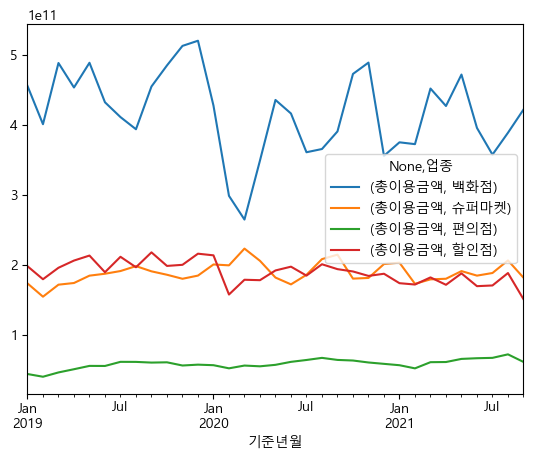

In [291]:
group_data.unstack().plot()

In [292]:
group_data = group_data.unstack()
group_data.columns

MultiIndex([('총이용금액',  '백화점'),
            ('총이용금액', '슈퍼마켓'),
            ('총이용금액',  '편의점'),
            ('총이용금액',  '할인점')],
           names=[None, '업종'])

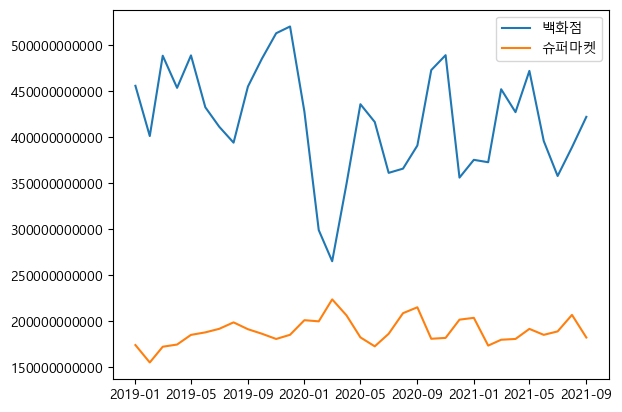

In [293]:
# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain', useMathText=True)
x = group_data.index
y1 = group_data[('총이용금액', '백화점')]
y2 = group_data[('총이용금액', '슈퍼마켓')]

plt.plot(x, y1, label='백화점')
plt.plot(x, y2, label='슈퍼마켓')
plt.legend()
plt.show()
# group_data.unsatck().plot()

- 온라인, 오프라인 카드 사용 내역 데이터 확인
    1. csv 폴더 안의 test_csv에서 온라인, 오프라인 데이터 로드
    2. 두 개의 데이터프레임 구조 확인
    3. 두 개의 데이터프레임 결하
        - 조인결합: 조건에 맞게 열 결합
            - 두 개의 데이터프레임이 같은 열의 데이터가 1개 이상
            - 다른 열의 데이터가 다수 존재
        - 유니언결합: 단순한 행이나 열의 결합
            - 컬럼의 구조가 같다면 -> 단순 행결합
            - 인덱스의 구조가 같다면 -> 단순 열결합
    4. 기준년우러 컬럼의 데이터를 시계열로 변경
    5. 기준년월, 업종을 기준으로 총이용금액의 합산을 시각화

In [294]:
offline = pd.read_csv('../../csv/test_csv/오프라인.csv', encoding='cp949')
online = pd.read_csv('../../csv/test_csv/온라인.csv', encoding='cp949')

In [295]:
# 데이터의 구조 파악
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.2+ KB


In [296]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [297]:
# 2개의 데이터프레임은 '업종' 부분을 제외한 나머지 구조가 같음
# online 데이터에 업종을 추가하고 결합
# 단순한 결합 -> 업종 부분에 결측치를 온라인으로 채워줌

# 단순 행결합
# concat() -> pandas에 존재 -> 단순 결합 형태이므로
# 결합되는 데이터프레임 개수 제한X
# 행결합할지, 열결합할지 지정 필요 -> axis

df = pd.concat( [offline, online], axis=0 )


In [298]:
# 결측치의 개수 확인
df.isna().sum()

crym              0
tco_btc_nm      651
ma_fem_dc         0
agegrp_dc         0
tco_btc_u_ct      0
tco_btc_u_am      0
dtype: int64

In [299]:
# fillna(): 결측치를 특정 데이터로 채움
#   method
        # ffill: 전 행 데이터가 존재한다면 해당 데이터로 결측치 채움
        # bfill: 후 행 데이터가 존재한다면 해당 데이터로 결측치 채움
df['tco_btc_nm'].fillna('온라인', inplace=True)
df.isna().sum()

C:\Users\toqha\AppData\Local\Temp\ipykernel_3404\906020746.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tco_btc_nm'].fillna('온라인', inplace=True)


crym            0
tco_btc_nm      0
ma_fem_dc       0
agegrp_dc       0
tco_btc_u_ct    0
tco_btc_u_am    0
dtype: int64

In [300]:
# 같은 데이터의 구조이지만 컬럼명이 다른 경우
# offline과 online 컬럼명을 변경하고
# online에 업종 컬럼을 추가해 '온라인' 대입
# 단순 행결합

offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [301]:
online['업종'] = '온라인'

In [302]:
online.head()

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,20,272915,13854081656,온라인
3,201901,1,30,1320227,82946127640,온라인
4,201901,1,40,1372052,95550848337,온라인


In [303]:
card_df = pd.concat(
    [offline, online],
    axis=0,
    ignore_index=True
)
card_df

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
3294,202109,온라인,2,50,3237324,1.813605e+11
3295,202109,온라인,2,60,1019719,7.002663e+10
3296,202109,온라인,2,70,159261,1.309103e+10
3297,202109,온라인,2,80,20094,1.935122e+09


In [304]:
# 성별 컬럼의 데이터 중 -와 9가 존재하는가
((card_df['성별'] == '-') |
    (card_df['성별'] == '9')).sum()

np.int64(0)

In [305]:
(card_df['성별'].isin(['-', '9'])).sum()

np.int64(0)

In [306]:
card_df['성별'].value_counts()

성별
2    1661
1    1638
Name: count, dtype: int64

In [307]:
card_df['성별'].unique()

array([1, 2])

In [308]:
# 성별 컬럼의 데이터를 1 -> 남자, 2 -> 여자 변경
# case1: 인덱스 조건을 성별이 1이라면 컬럼의 조건은 성별 안의 values를 남자
df2 = card_df.copy()

In [309]:
flag_idx = df2['성별'] == 1
flag_idx2 = df2['성별'] == 2

df2.loc[flag_idx, '성별'] = '남자'
df2.loc[flag_idx2, '성별'] = '여자'

C:\Users\toqha\AppData\Local\Temp\ipykernel_3404\4118242225.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남자' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[flag_idx, '성별'] = '남자'


In [310]:
df2['성별'].value_counts()

성별
여자    1661
남자    1638
Name: count, dtype: int64

In [311]:
# map 함수를 이용해 남자, 여자 변경
df3 = card_df.copy()

In [312]:
# map + 일반 함수 => Series로 되돌려줌
def change(x):
    if x == 1:
        result = '남자'
    elif x == 2:
        result = '여자'
    elif x == 9:
        result = '무관'
    else:
        result = '결측'
    return result

df3['성별'].map(
    change
)

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
3294    여자
3295    여자
3296    여자
3297    여자
3298    여자
Name: 성별, Length: 3299, dtype: object

In [313]:
# map + lambda
# 한줄로 표현하는 if 조건식
# 조건식이 참인 경우의 데이터 if 조건식 else(거짓인 경우 데이터)
df3['성별'].map(
    lambda x : '남자' if (x == 1) else '여자'
)

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
3294    여자
3295    여자
3296    여자
3297    여자
3298    여자
Name: 성별, Length: 3299, dtype: object

In [314]:
_dict = {1 : '남자', 2 : '여자'}
df3['성별'].map(
    lambda x : _dict[x]
)

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
3294    여자
3295    여자
3296    여자
3297    여자
3298    여자
Name: 성별, Length: 3299, dtype: object

In [315]:
# replace( '찾는 문자열', '치환될 분자열 )
# replace( { '찾는 문자열' : '치환될 문자열', ... } )
df3['성별'].replace(_dict)

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
3294    여자
3295    여자
3296    여자
3297    여자
3298    여자
Name: 성별, Length: 3299, dtype: object

In [316]:
_list = []
for idx in range(len(df3)):
    # print(df3.loc[idx, '성별'])
    # break
    if df3.loc[idx, '성별'] == 1:
        _list.append('남자')
    else:
        _list.append('여자')
_list

['남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',

In [317]:
len(df3['성별']) == len(_list)

True

In [318]:
# for 반복문 이용
for i in range(len(df3)):
    if df3.loc[i, '성별'] == 1:
        df3.loc[i, '성별']  = '남자'
    else:       # 성별 데이터가 2인 경우 (여기선 1,2만 있음)
        df3.loc[i, '성별'] = '여자'

C:\Users\toqha\AppData\Local\Temp\ipykernel_3404\3410678983.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남자' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[i, '성별']  = '남자'


In [319]:
df3['성별'].value_counts()

성별
여자    1661
남자    1638
Name: count, dtype: int64

In [320]:
card_df['기준년월'] = pd.to_datetime(
    card_df['기준년월'], format='%Y%m'
)

In [321]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    3299 non-null   datetime64[ns]
 1   업종      3299 non-null   object        
 2   성별      3299 non-null   int64         
 3   연령대     3299 non-null   int64         
 4   총이용건수   3299 non-null   int64         
 5   총이용금액   3299 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 154.8+ KB


In [322]:
group_data = card_df.groupby(
    ['기준년월', '업종']
)['총이용금액'].sum()
group_data

기준년월        업종  
2019-01-01  백화점     4.558955e+11
            슈퍼마켓    1.736131e+11
            온라인     7.782817e+11
            편의점     4.408358e+10
            할인점     1.981718e+11
                        ...     
2021-09-01  백화점     4.220812e+11
            슈퍼마켓    1.818095e+11
            온라인     1.195275e+12
            편의점     6.136282e+10
            할인점     1.510796e+11
Name: 총이용금액, Length: 165, dtype: float64

In [323]:
group_data2 = group_data.unstack()
group_data2     # 업종이 컬럼으로 올라감

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11
2019-02-01,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11
2019-03-01,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11
2019-04-01,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11
2019-05-01,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11
2019-06-01,4.325099e+11,1.874238e+11,7.366348e+11,5.559312e+10,1.895914e+11
2019-07-01,4.113440e+11,1.912817e+11,7.894194e+11,6.148315e+10,2.116533e+11
2019-08-01,3.939827e+11,1.983115e+11,7.739429e+11,6.140625e+10,1.966998e+11
2019-09-01,4.550747e+11,1.908706e+11,7.892287e+11,6.042129e+10,2.179884e+11


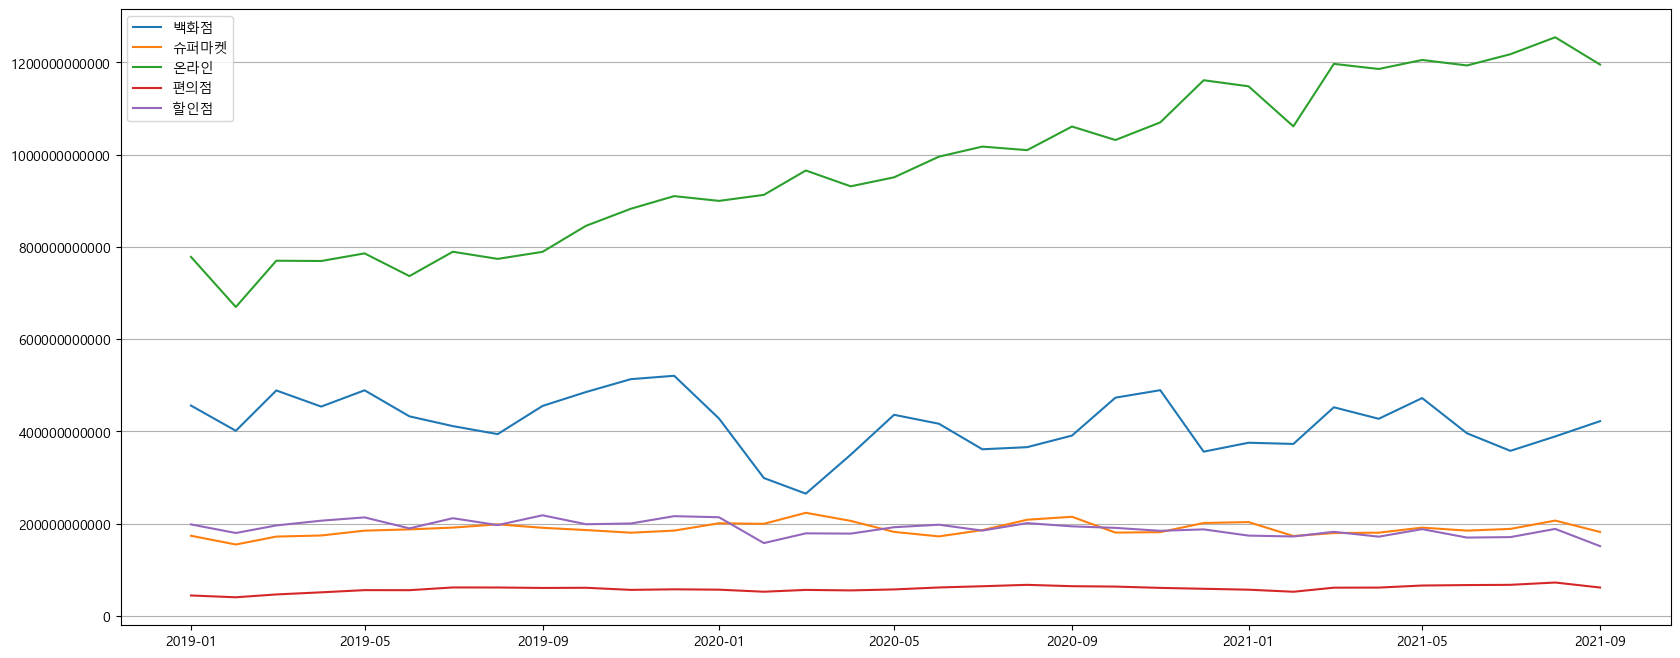

In [325]:
x = group_data2.index

y1 = group_data2['백화점']
y2 = group_data2['슈퍼마켓']
y3 = group_data2['온라인']
y4 = group_data2['편의점']
y5 = group_data2['할인점']

# 그래프 사이즈 변경
plt.figure(figsize = (20, 8))
# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain', useMathText=True)
# y축에 그리드 선 추가
plt.grid(True, axis='y')
plt.plot(x, y1, label='백화점')
plt.plot(x, y2, label='슈퍼마켓')
plt.plot(x, y3, label='온라인')
plt.plot(x, y4, label='편의점')
plt.plot(x, y5, label='할인점')

# 그래프의 범례 추가
plt.legend()
plt.show()

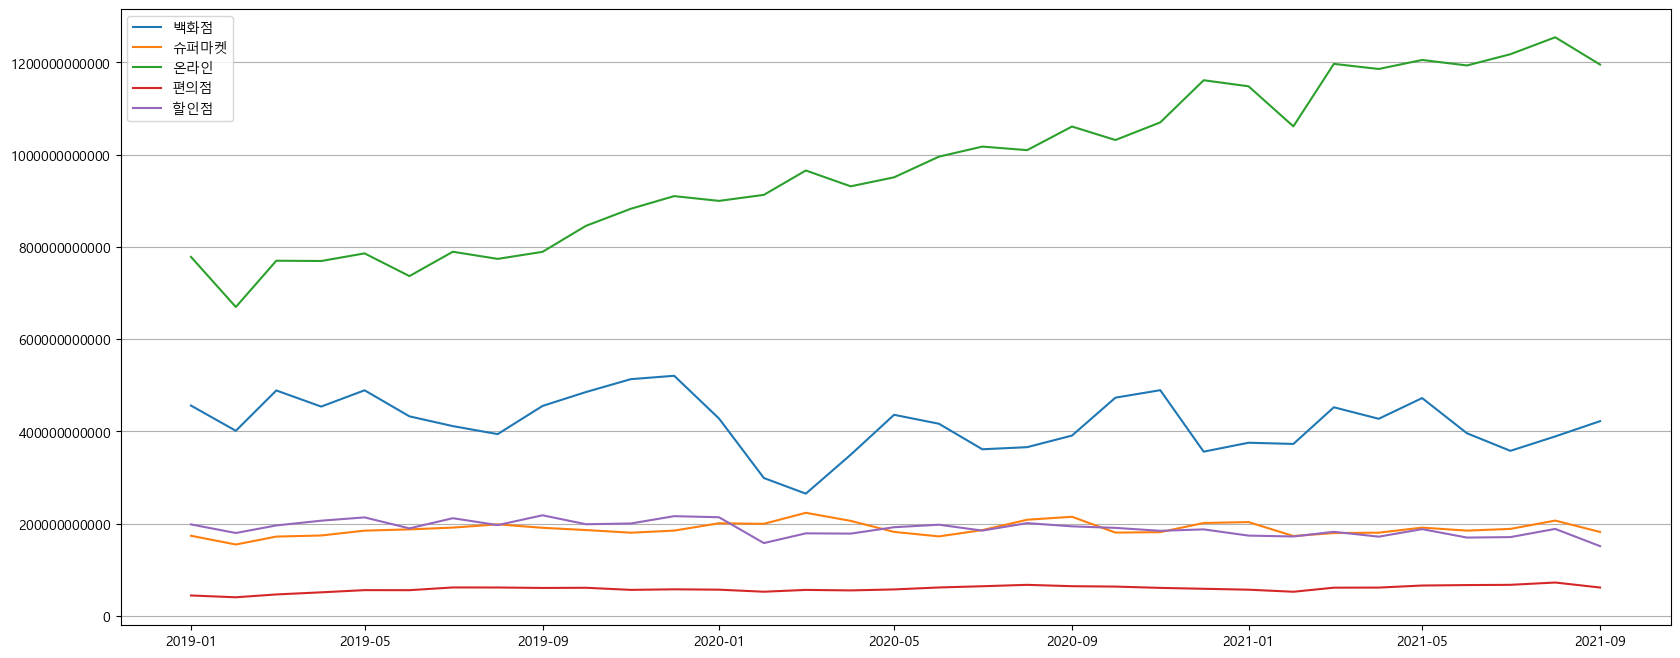

In [328]:
# for 반복문 활용
# 그래프 사이즈 변경
plt.figure(figsize = (20, 8))
# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain', useMathText=True)
# y축에 그리드 선 추가
plt.grid(True, axis='y')

for col in group_data2.columns:
    # print(col)
    plt.plot(group_data2[col], label=col)
# 그래프의 범례 추가
plt.legend()
plt.show()

In [330]:
group_data2['오프라인'] = group_data2.drop('온라인', axis=1).sum(axis=1)
group_data2.head()

업종,백화점,슈퍼마켓,온라인,편의점,할인점,오프라인
기준년월,,,,,,
2019-01-01,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11,8.717640e+11
2019-02-01,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11,7.755979e+11
2019-03-01,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11,9.027603e+11
2019-04-01,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11,8.850403e+11
2019-05-01,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11,9.427953e+11


In [336]:
pivot_data = pd.pivot_table(
    card_df,
    index = '기준년월',
    columns = '업종',
    values = '총이용금액',
    aggfunc = 'sum',
    margins = True      # All 값을 데이터프레임에 함께 보여줌 
)

In [ ]:
pivot_data['오프라인'] = pivot_data['All'] - pivot_data['온라인']
pivot_data

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All,오프라인
기준년월,,,,,,,
2019-01-01 00:00:00,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11,1.650046e+12,8.717640e+11
2019-02-01 00:00:00,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11,1.445225e+12,7.755979e+11
2019-03-01 00:00:00,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11,1.672743e+12,9.027603e+11
2019-04-01 00:00:00,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11,1.654384e+12,8.850403e+11
2019-05-01 00:00:00,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11,1.728672e+12,9.427953e+11
2019-06-01 00:00:00,4.325099e+11,1.874238e+11,7.366348e+11,5.559312e+10,1.895914e+11,1.601753e+12,8.651183e+11
2019-07-01 00:00:00,4.113440e+11,1.912817e+11,7.894194e+11,6.148315e+10,2.116533e+11,1.665182e+12,8.757622e+11
2019-08-01 00:00:00,3.939827e+11,1.983115e+11,7.739429e+11,6.140625e+10,1.966998e+11,1.624343e+12,8.504003e+11
2019-09-01 00:00:00,4.550747e+11,1.908706e+11,7.892287e+11,6.042129e+10,2.179884e+11,1.713584e+12,9.243550e+11


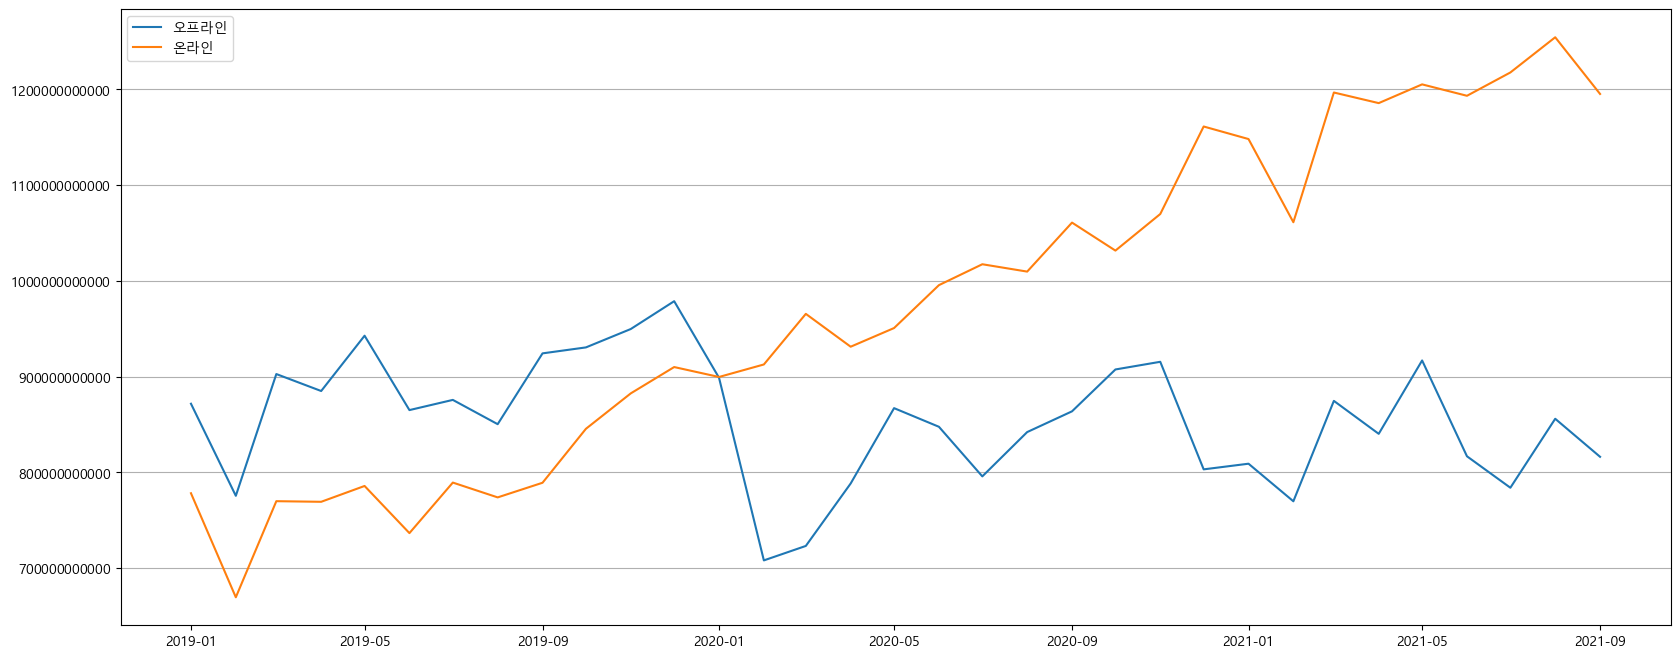

In [338]:
# 그래프 사이즈 변경
plt.figure(figsize = (20, 8))
# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain', useMathText=True)
# y축에 그리드 선 추가
plt.grid(True, axis='y')

plt.plot(group_data2['오프라인'], label='오프라인')
plt.plot(group_data2['온라인'], label='온라인')

plt.legend()
plt.show()

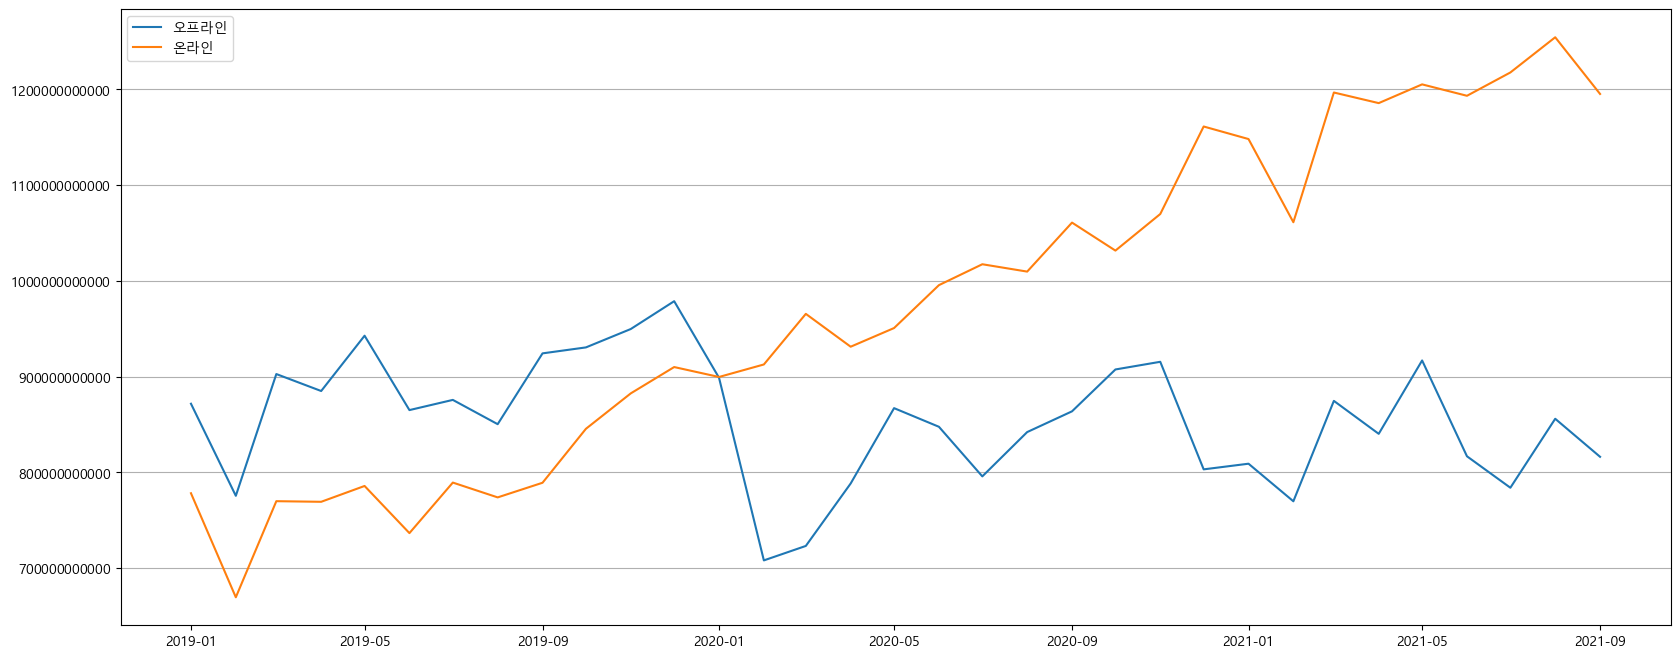

In [340]:
# 그래프 사이즈 변경
plt.figure(figsize = (20, 8))
# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain', useMathText=True)
# y축에 그리드 선 추가
plt.grid(True, axis='y')

plt.plot(pivot_data.iloc[:-1, -1], label='오프라인')
plt.plot(pivot_data.iloc[:-1, 2], label='온라인')

plt.legend()
plt.show()

In [341]:
card_df.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03
1,2019-01-01,백화점,1,10,379,1.945872e+07
2,2019-01-01,백화점,1,20,45173,4.747711e+09
3,2019-01-01,백화점,1,30,271858,2.791826e+10
4,2019-01-01,백화점,1,40,391109,3.791149e+10


In [ ]:
# 연령대의 빈도수 확인
card_df['연령대'].value_counts()

연령대
10    330
20    330
30    330
70    330
40    330
50    330
60    330
90    330
80    330
0     284
1      45
Name: count, dtype: int64